<a href="https://colab.research.google.com/github/YumnaZai/ML-Projects/blob/main/ANN_G.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#What Model : Artificial Neural Network Model

### 1. What is solved : Binary classification

### Binary class label indicating "good" or "bad" radar returns

#### It contains data collected by a radar system in Goose Bay, Labrador, which was used to detect free electrons in the ionosphere

## 2. Collect relevent data - Import data

In [1]:
import pandas as pd
url = "https://raw.githubusercontent.com/selva86/datasets/refs/heads/master/Ionosphere.csv"
df = pd.read_csv(url)
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V26,V27,V28,V29,V30,V31,V32,V33,V34,Class
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,1
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,0
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,1
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,0
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1,0,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,...,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307,1
347,1,0,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,...,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712,1
348,1,0,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,...,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577,1
349,1,0,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,...,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243,1


## Encode categorical data:
Use one-hot encoding or label encoding.

## Normalize/scale numerical data:
Often using Min-Max or StandardScaler.


## Extract the independent and dependent variables

In [2]:
x = df.drop(columns=['Class'], axis=1)  #independent variables
y = df['Class'] # dependent variable
print(y)

0      1
1      0
2      1
3      0
4      1
      ..
346    1
347    1
348    1
349    1
350    1
Name: Class, Length: 351, dtype: int64


##3. Split Data to train, validation and test

### Validation set

In [3]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

#Import Dependencies

In [4]:
# Import tools to build a neural network
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout

# 4. Choose the Right Architecture

## - Input layers : Number of neurons = 10(input features)

## - Hidden layer 1 : Number of neurons per layer = 5

## - Output layers : Number of neurons = 1

In [5]:
model= Sequential() #to stack the layers one under the other

# The input layer
model.add(Dense(units=10,activation='relu',input_dim=len(x_train.columns)))
# 10 neurons, relu function, number of input features = input columns

# Second hidden layer
model.add(Dense(units=5,activation='relu'))

# output layer
model.add(Dense(units=1,activation='sigmoid'))
# 1 neuron, sigmoid- (only 0 and 1 as output)

model.summary()
# how many layers, how many parameters, shape of input and output at each step

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │           350 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │            55 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 411 (1.61 KB)

 Trainable params: 411 (1.61 KB)

 Non-trainable params: 0 (0.00 B)

#5. Compile Model

## Loss function: Binary classification: binary_crossentropy

## An optimizer: SGD

## Evaluation metrics: Accuracy

In [6]:
# Binary Calssifcation
model.compile(loss= 'binary_crossentropy',
              optimizer='sgd',
              metrics =['accuracy'])
# loss = 'binary_crossentropy' - how to measure error
# optimizer ='sgd' - how to adjust itself to reduce the error
# metrics = ['accuracy'] - track accuracy

#6. Train the Model
- Feed the training data in batches over epochs

- Monitor performance on validation data
- Use callbacks:

  EarlyStopping: Stop training if no improvement

  ModelCheckpoint: Save best-performing model

In [7]:
# Training the model
model.fit(x_train, y_train,validation_data=(x_test,y_test), epochs=100, batch_size=32)

Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.2685 - loss: 0.7424 - val_accuracy: 0.2394 - val_loss: 0.7348
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.2672 - loss: 0.7358 - val_accuracy: 0.3662 - val_loss: 0.7218
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4419 - loss: 0.7123 - val_accuracy: 0.4366 - val_loss: 0.7136
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4328 - loss: 0.7188 - val_accuracy: 0.4789 - val_loss: 0.7077
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6021 - loss: 0.7004 - val_accuracy: 0.5352 - val_loss: 0.7029
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6162 - loss: 0.6984 - val_accuracy: 0.5493 - val_loss: 0.6987
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6345 - loss: 0.6967 - val_accuracy: 0.5493 - val_loss: 0.6950
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6607 - loss: 0.6923 - val_accuracy: 0.5634 - val_loss:

In [8]:
y_nn_train_pred = model.predict(x_train)
y_nn_test_pred = model.predict(x_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


In [9]:
print(y_nn_train_pred)

[[0.6700764 ]
 [0.6399504 ]
 [0.6746968 ]
 [0.4785057 ]
 [0.6607832 ]
 [0.6380873 ]
 [0.6729796 ]
 [0.670166  ]
 [0.6740173 ]
 [0.6588497 ]
 [0.61826795]
 [0.6719354 ]
 [0.6740692 ]
 [0.62919605]
 [0.57112855]
 [0.65021276]
 [0.6741876 ]
 [0.6746231 ]
 [0.5716205 ]
 [0.65891397]
 [0.6745067 ]
 [0.67415434]
 [0.46444368]
 [0.4352952 ]
 [0.6343956 ]
 [0.67454386]
 [0.6689763 ]
 [0.650377  ]
 [0.5923864 ]
 [0.67227495]
 [0.58495474]
 [0.5788366 ]
 [0.67426294]
 [0.6462104 ]
 [0.6245567 ]
 [0.26714078]
 [0.6278996 ]
 [0.46135125]
 [0.6746968 ]
 [0.3729595 ]
 [0.37767002]
 [0.67450726]
 [0.5691635 ]
 [0.67443484]
 [0.6111401 ]
 [0.6738956 ]
 [0.6336609 ]
 [0.66722864]
 [0.67422336]
 [0.66208607]
 [0.6743414 ]
 [0.67374444]
 [0.67433876]
 [0.67452043]
 [0.67400074]
 [0.6302598 ]
 [0.6737615 ]
 [0.67446584]
 [0.20999426]
 [0.6737341 ]
 [0.5140195 ]
 [0.292934  ]
 [0.3416985 ]
 [0.6648916 ]
 [0.544706  ]
 [0.5778264 ]
 [0.6736284 ]
 [0.6734455 ]
 [0.6739827 ]
 [0.56838727]
 [0.65692824]
 [0.63

# 7. Evaluate the Model
- Use metrics appropriate to the task:
  Classification: Accuracy, F1-score, Confusion matrix

In [10]:
# As the output are probabailities, Convert them class lables first
y_nn_train_pred_lables = (y_nn_train_pred > 0.5).astype(int)
y_nn_test_pred_labels = (y_nn_test_pred > 0.5).astype(int)

In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Train
accuracy_train = accuracy_score(y_train, y_nn_train_pred_lables) # Calculate
precision_train = precision_score(y_train, y_nn_train_pred_lables ) #calculate
recall_train = recall_score(y_train, y_nn_train_pred_lables)
f1_train = f1_score(y_train, y_nn_train_pred_lables)
confusion_train = confusion_matrix(y_train, y_nn_train_pred_lables)

# Test
accuracy_test = accuracy_score(y_test, y_nn_test_pred_labels)
precision_test = precision_score(y_test, y_nn_test_pred_labels)
recall_test = recall_score(y_test, y_nn_test_pred_labels)
f1_test = f1_score(y_test, y_nn_test_pred_labels)
confusion_test = confusion_matrix(y_test, y_nn_test_pred_labels)

In [13]:
print("NN Acuuracy (Train):",accuracy_train)
print("NN Precision (Train):",precision_train)
print("NN Recall (Test):",recall_train)
print("NN fl (Test):",f1_train)
print("NN Confusion matrix (Train):", confusion_train)

NN Acuuracy (Train): 0.8142857142857143
NN Precision (Train): 0.7892376681614349
NN Recall (Test): 0.9723756906077348
NN fl (Test): 0.8712871287128713
NN Confusion matrix (Train): [[ 52  47]
 [  5 176]]


In [14]:
print("NN Acuuracy (Test):",accuracy_test)
print("NN Precision (Test):",precision_test)
print("NN Recall (Test):",recall_test)
print("NN fl (Test):",f1_test)
print("NN Confusion matrix (Test):", confusion_test)

NN Acuuracy (Test): 0.7887323943661971
NN Precision (Test): 0.7457627118644068
NN Recall (Test): 1.0
NN fl (Test): 0.8543689320388349
NN Confusion matrix (Test): [[12 15]
 [ 0 44]]


In [ ]:
model.save('weights.h5')

Text(0, 0.5, 'y - axis')

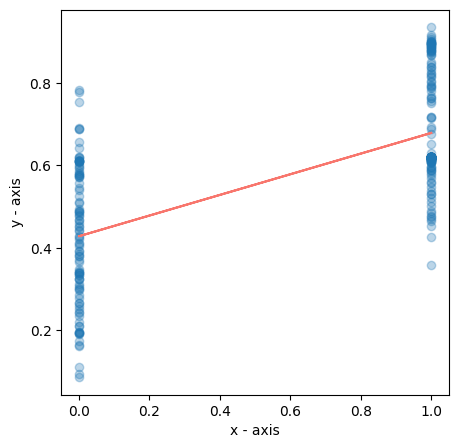

In [ ]:
"""
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(5,5))
plt.scatter(x=y_train, y=y_nn_train_pred, alpha=0.3)

# The trend line
z = np.polyfit(y_train, y_nn_train_pred.flatten(), 1)
p = np.poly1d(z)

plt.plot(y_train,p(y_train),"#F8766D")
plt.plot()
plt.xlabel("x - axis")
plt.ylabel("y - axis")
"""